In [ ]:
# How to read rec file

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx 

In [2]:
def decodeBox(yolobox, size, dscale):
    i, j, cx, cy, w, h = yolobox
    cxt = j*dscale + cx*dscale
    cyt = i*dscale + cy*dscale
    wt = w*size
    ht = h*size
    return [cxt, cyt, wt, ht]


def bboxdraw(img, label, dscale=32):
    assert label.shape == (7,7,5)
    size = img.shape[1]
    ilist, jlist = np.where(label[:,:,0]==1)
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for i,j in zip(ilist, jlist): 
        cx,cy,w,h = label[i,j,1:]
        cxt, cyt, wt ,ht = decodeBox([i, j, cx,cy,w,h], size, dscale)
        # Create a Rectangle patch
        rect = patches.Rectangle((cxt-wt/2,cyt-ht/2), wt,ht,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [3]:
data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat.rec',
                             data_shape=(3,224,224),
                             label_width=7*7*5, 
                             batch_size=1,)

In [9]:
num=5
data.reset()
for i in range(num):
    batch = data.next()

In [10]:
batch.data

[<NDArray 1x3x224x224 @cpu(0)>]

In [11]:
batch.label

[<NDArray 1x245 @cpu(0)>]

In [12]:
img = batch.data[0].asnumpy()[0]
label = batch.label[0].asnumpy().reshape((7,7,5))

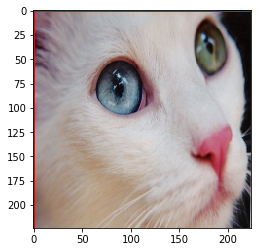

In [13]:
img4show = np.uint8(img.transpose((1,2,0)))
bboxdraw(img4show, label)

In [3]:
help(mx.sym.reshape)

Help on function reshape in module mxnet.symbol:

reshape(*args, **kwargs)
    Reshapes the input array.
    
    .. note:: ``Reshape`` is deprecated, use ``reshape``
    
    Given an array and a shape, this function returns a copy of the array in the new shape.
    The shape is a tuple of integers such as (2,3,4).The size of the new shape should be same as the size of the input array.
    
    Example::
    
      reshape([1,2,3,4], shape=(2,2)) = [[1,2], [3,4]]
    
    Some dimensions of the shape can take special values from the set {0, -1, -2, -3, -4}. The significance of each is explained below:
    
    - ``0``  copy this dimension from the input to the output shape.
    
      Example::
    
      - input shape = (2,3,4), shape = (4,0,2), output shape = (4,3,2)
      - input shape = (2,3,4), shape = (2,0,0), output shape = (2,3,4)
    
    - ``-1`` infers the dimension of the output shape by using the remainder of the input dimensions
      keeping the size of the new array sa

In [4]:
help(mx.sym.LinearRegressionOutput)

Help on function LinearRegressionOutput in module mxnet.symbol:

LinearRegressionOutput(*args, **kwargs)
    Computes and optimizes for squared loss during backward propagation.
    Just outputs ``data`` during forward propagation.
    
    If :math:`\hat{y}_i` is the predicted value of the i-th sample, and :math:`y_i` is the corresponding target value,
    then the squared loss estimated over :math:`n` samples is defined as
    
    :math:`\text{SquaredLoss}(y, \hat{y} ) = \frac{1}{n} \sum_{i=0}^{n-1} \left( y_i - \hat{y}_i \right)^2`
    
    .. note::
       Use the LinearRegressionOutput as the final output layer of a net.
    
    By default, gradients of this loss function are scaled by factor `1/n`, where n is the number of training examples.
    The parameter `grad_scale` can be used to change this scale to `grad_scale/n`.
    
    
    
    Defined in src/operator/regression_output.cc:L51
    
    Parameters
    ----------
    data : Symbol
        Input data to the function.
